In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline


Text(0.5, 0, 'tiempo')

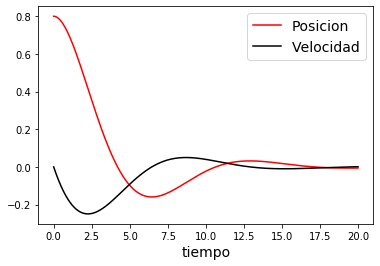

In [2]:
k = 0.3 #Constante del muelle
m = 1.0 #Masa
B = 0.5 #Constante de mortiguación

def armonico(variables,t):
    x,y = variables
    return [y,-k*x/m-B/m*y]
inicial = [0.8,0] #Vector de posición inicial y velocidad inicial
#Condiciones iniciales x(t=0)=0.8 [m] y(t=0)=0 [m/s]

#Tiempo = np.linspace(0,15) #dominio temporal de 0 a 15
tiempo = np.arange(0,20,0.01)

resultado= odeint(armonico, inicial, tiempo)
#El sistema se resuelve con 
#odeint(sistema, condiciones iniciales, rango donde graficaremos)

xx, yy = resultado.T #extraer posición y velocidad.

plt.plot(tiempo, xx, c='r', label='Posicion')
plt.plot(tiempo, yy, c='k', label='Velocidad')
plt.legend(loc='best', prop = {'size':14})
plt.xlabel('tiempo',fontsize = 14)


In [3]:
from ipywidgets import *

In [4]:
def amortiguador(k = 0, m = 1.0, B = 0.5):
    def armonico(variables,t):
        x,y = variables
        return [y,-k*x/m-B/m*y]
    inicial = [0.8,0.5] #Vector de posición inicial y velocidad inicial
    #Condiciones iniciales x(t=0)=0.8 [m] y(t=0)=0 [m/s]

    #Tiempo = np.linspace(0,15) #dominio temporal de 0 a 15
    tiempo = np.arange(0,20,0.01)

    resultado= odeint(armonico, inicial, tiempo)
    #El sistema se resuelve con 
    #odeint(sistema, condiciones iniciales, rango donde graficaremos)

    xx, yy = resultado.T #extraer posición y velocidad.

    plt.plot(tiempo, xx, c='r', label='Posicion')
    plt.plot(tiempo, yy, c='k', label='Velocidad')
    plt.legend(loc='best', prop = {'size':14})
    plt.xlabel('tiempo',fontsize = 14)
    plt.show()
    
interact_manual(amortiguador, k = (0,10,0.1), m = (0,10,0.1), B = (0,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='k', max=10.0), FloatSlider(value=1.0, description='m…

<function __main__.amortiguador(k=0, m=1.0, B=0.5)>

In [6]:
def poblacion(r=1):
    def pobla(x,t):
        return r*x*(1-x)
    x0 = 0.05
    #Condiciones iniciales x(t=0)=0.8 [m] y(t=0)=0 [m/s]

    #Tiempo = np.linspace(0,15) #dominio temporal de 0 a 15
    tiempo = np.linspace(0,10)

    xx = odeint(pobla, x0, tiempo)
    #El sistema se resuelve con 
    #odeint(sistema, condiciones iniciales, rango donde graficaremos)

    plt.plot(tiempo, xx)
    plt.xlabel('$t$',fontsize = 14)
    plt.ylabel('$x$',fontsize = 14)
    plt.show()
    
interact_manual(poblacion, r=(0,10,0.1))

interactive(children=(FloatSlider(value=1.0, description='r', max=10.0), Button(description='Run Interact', st…

<function __main__.poblacion(r=1)>

In [7]:
def robot(R = 0.5, L = 1.0):
    vr = 2.0
    vt = 0.5*vr
    def comportamiento(variables,t):
        x,y,phi = variables
        return [R/2*(vr+vt)*np.cos(phi), R/2*(vr+vt)*np.sin(phi), R/L*(vr-vt)]
    inicial = [0,0,0]
   
    tiempo = np.arange(0,20,0.01)

    resultado= odeint(comportamiento, inicial, tiempo)
    #El sistema se resuelve con 
    #odeint(sistema, condiciones iniciales, rango donde graficaremos)

    xx = resultado[:,0] 
    yy = resultado[:,1]

    plt.plot(xx,yy, c='r')
    plt.xlabel('tiempo',fontsize = 14)
    plt.show()
    
interact_manual(robot, R = (0,10,0.1), L = (0,10,0.1))

interactive(children=(FloatSlider(value=0.5, description='R', max=10.0), FloatSlider(value=1.0, description='L…

<function __main__.robot(R=0.5, L=1.0)>